In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# BeautifulSoup is used to pulling data out of HTML and XML files
from bs4 import BeautifulSoup as bs
# For making HTTP requests in Python code
import requests

In [3]:
# Programming languages we are going to be looking for
search_languages = [
"Python",
"Java",
"C++",
"Matlab",
"Javascript",
]

In [4]:
# First webside: Indeed
indeed_list = []

for language in search_languages:
    url = f'https://www.indeed.fr/emplois?q={language}&l=France'
    num_offers = ""
    try:
        r = requests.get(url, timeout=5)
        soup = bs(r.text, 'html.parser')
        count = soup.find('div', id="searchCountPages").get_text()
        for s in count.split() :
            if s.isdigit() and count.split().index(s) > 1: 
                num_offers = num_offers+s
        indeed_list.append(int(num_offers))
    except Exception as e:
        print(f'error: {e}')
        
indeed_list

[6842, 7617, 19944, 728, 5505]

In [5]:
monster_list = []

for language in search_languages:
    url = f'https://www.monster.fr/emploi/recherche/?q={language}&where=France&cy=fr'
    try:
        r =requests.get(url, timeout=5)
        soup = bs(r.text, 'html.parser')
        count = soup.find('h2', class_="figure").get_text()
        num_l = count.split()
        monster_count = num_l[0].replace("(", "")
        monster_list.append(int(monster_count))
    except Exception as e:
        print(f'error: {e}')
        
monster_list

[1151, 1992, 587, 176, 2445]

In [6]:
pole_emploi_list = []

for language in search_languages:
    url = f'https://candidat.pole-emploi.fr/offres/recherche?motsCles={language}&offresPartenaires=true&rayon=10&tri=0'
    try:
        r = requests.get(url, timeout=5)
        soup = bs(r.text, 'html.parser')
        count = soup.find('div', id="zoneAfficherListeOffres").get_text()
        numb = count.split()
        pole_emploi_list.append(int(numb[0]))
    except Exception as e:
        print(f'error: {e}')
        
pole_emploi_list

[6778, 3966, 4825, 5, 351]

In [7]:
keljob_list = []

for language in search_languages:
    url = f'https://www.keljob.com/recherche?q={language}'
    
    try:
        r = requests.get(url, timeout=5)
        soup = bs(r.text, 'html.parser')
        count = soup.find('h1', class_="search-counter no-margin-bottom").get_text()
        numb = count.split()
        keljob_list.append(int(numb[0].replace('Une','1')))
    except Exception as e:
        print(f'error: {e}')
        
keljob_list

[129, 181, 5, 1, 135]

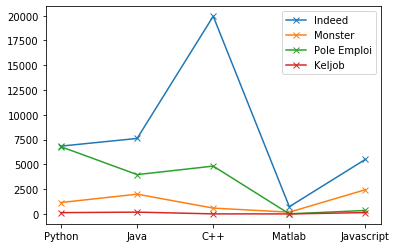

In [8]:
x = np.array([1, 2, 3, 4, 5])
my_xticks = ['Python','Java','C++','Matlab','Javascript']
plt.xticks(x, my_xticks)
plt.plot(x, indeed_list, '-x', label = 'Indeed')
plt.plot(x, monster_list, '-x', label = 'Monster')
plt.plot(x, pole_emploi_list, '-x', label = 'Pole Emploi')
plt.plot(x, keljob_list, '-x', label = 'Keljob')
plt.legend()
plt.show()